# Stack Academy - Data Science do Zero

# Módulo 07 - Estatística Aplicada e Pré-Processamento de Dados

# 7.6 - Técnicas de Amostragem de Dados

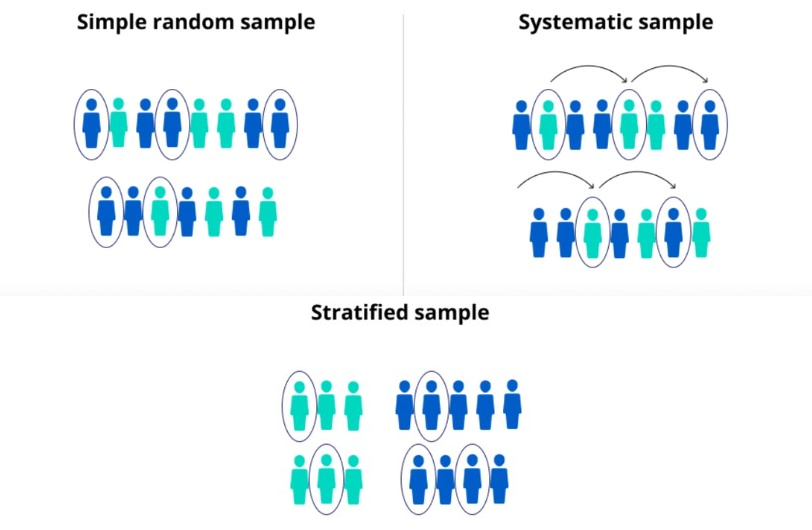

In [6]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\amostragem.png')

Amostragem Aleatória Simples: Retira uma amostra completamente de forma aleatória.
    
Amostragem Sistemática: Define uma semente aleatória e a partir dessa semente usamos de forma sistemática para gerar IDs, numeração; das observações.
    
Amostragem Estratificada: Especifica determinada caracteristica da população e extrai os dados baseados naquela característica para pertenceram a nossa amostra.

### Amostragem Aleatória Simples

Um determinado número de elementos é retirado da população de forma aleatória.

In [162]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Carregando a base de dados.

In [9]:
df = pd.read_csv(r"Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\covid19.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50982 entries, 0 to 50981
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  50982 non-null  int64  
 2   age                 50982 non-null  object 
 3   sex                 50982 non-null  object 
 4   health_region       50982 non-null  object 
 5   province            50982 non-null  object 
 6   country             50982 non-null  object 
 7   date_report         50982 non-null  object 
 8   report_week         50982 non-null  object 
 9   has_travel_history  1150 non-null   object 
 10  locally_acquired    574 non-null    object 
 11  case_source         50982 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [11]:
df.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
2,NaN,1,40-49,Male,Vancouver Coastal,BC,Canada,2020-01-28,2020-01-26,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,2020-01-26,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,2020-02-02,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...


Criando uma amostra com apenas 1000 registros a partir do conjunto de dados.

In [12]:
df_sample = df.sample(n=1000)

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 45730 to 17162
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  1000 non-null   int64  
 2   age                 1000 non-null   object 
 3   sex                 1000 non-null   object 
 4   health_region       1000 non-null   object 
 5   province            1000 non-null   object 
 6   country             1000 non-null   object 
 7   date_report         1000 non-null   object 
 8   report_week         1000 non-null   object 
 9   has_travel_history  28 non-null     object 
 10  locally_acquired    15 non-null     object 
 11  case_source         1000 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 101.6+ KB


Especificando o tamanho da amostra através do percentual.

In [14]:
df_sample = df.sample(frac=0.10)

In [15]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 28484 to 8804
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  5098 non-null   int64  
 2   age                 5098 non-null   object 
 3   sex                 5098 non-null   object 
 4   health_region       5098 non-null   object 
 5   province            5098 non-null   object 
 6   country             5098 non-null   object 
 7   date_report         5098 non-null   object 
 8   report_week         5098 non-null   object 
 9   has_travel_history  110 non-null    object 
 10  locally_acquired    60 non-null     object 
 11  case_source         5098 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 517.8+ KB


### Amostragem Aleatória Estratificada

Importando o método train_test_split para fazer a amostragem.

In [16]:
from sklearn.model_selection import train_test_split

Contagem de registro.

In [17]:
df['province'].value_counts()

Quebec           25757
Ontario          16337
Alberta           4850
BC                2053
Nova Scotia        915
Saskatchewan       366
Manitoba           272
NL                 258
New Brunswick      118
PEI                 27
Repatriated         13
Yukon               11
NWT                  5
Name: province, dtype: int64

Gerando a amostragem estratificada.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('province',axis=1),
                                                    df['province'],
                                                    stratify=df['province'],
                                                    test_size=0.20)

# df.drop('province',axis=1): Excluindo coluna dos dados de treino
# df['province']: Mantem o df coluna 'province' para teste
# stratify=df['province']: Os dados de 'province' serão usados como estrato
# test_size=0.20: Tamanho da observação - 20%

Verificando a forma dos dados.

In [19]:
y_test.shape

(10197,)

Verificando a contagem de registros.

(Foi mantido o percentual de 20% desejado para cada província)

In [20]:
y_test.value_counts()

Quebec           5152
Ontario          3267
Alberta           970
BC                411
Nova Scotia       183
Saskatchewan       73
Manitoba           54
NL                 52
New Brunswick      24
PEI                 5
Repatriated         3
Yukon               2
NWT                 1
Name: province, dtype: int64

### Amostragem Sistemática

Gerando a semente aleatória

In [21]:
import numpy as np

In [26]:
# random.choice: Escolha de forma aleatória um número entre 1 e 10.
semente = np.random.choice(10, 1)

In [27]:
semente

array([8])

Gerando índices a partir da semente.

In [28]:
indices = np.arange(0,100,semente)

In [29]:
indices

array([ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96])

Gerando a amostra a partir dos índices.

In [30]:
amostra = df.loc[indices,:]

Verificando os dados da amostra.

In [31]:
amostra

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,2020-01-19,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
8,NaN,6,30-39,Female,Fraser,BC,Canada,2020-02-20,2020-02-16,t,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...
16,NaN,9,30-39,Female,York,Ontario,Canada,2020-02-29,2020-02-23,t,NaN,https://news.ontario.ca/mohltc/en/2020/02/onta...
24,NaN,16,60-69,Female,York,Ontario,Canada,2020-03-03,2020-03-01,t,NaN,https://toronto.ctvnews.ca/three-new-cases-of-...
32,NaN,12,30-39,Female,Vancouver Coastal,BC,Canada,2020-03-03,2020-03-01,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0058-0...
40,NaN,16,50-59,Female,Vancouver Coastal,BC,Canada,2020-03-05,2020-03-01,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0062-0...
48,NaN,25,50-59,Male,Toronto,Ontario,Canada,2020-03-06,2020-03-01,t,NaN,https://news.ontario.ca/mohltc/en/2020/03/onta...
56,NaN,24,60-69,Female,Fraser,BC,Canada,2020-03-07,2020-03-01,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0064-0...
64,NaN,30,60-69,Female,Toronto,Ontario,Canada,2020-03-08,2020-03-08,t,NaN,https://news.ontario.ca/mohltc/en/2020/03/onta...
72,NaN,31,50-59,Female,Vancouver Coastal,BC,Canada,2020-03-09,2020-03-08,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0068-0...


Contagem de registros.

In [32]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 96
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_id             0 non-null      float64
 1   provincial_case_id  13 non-null     int64  
 2   age                 13 non-null     object 
 3   sex                 13 non-null     object 
 4   health_region       13 non-null     object 
 5   province            13 non-null     object 
 6   country             13 non-null     object 
 7   date_report         13 non-null     object 
 8   report_week         13 non-null     object 
 9   has_travel_history  13 non-null     object 
 10  locally_acquired    2 non-null      object 
 11  case_source         13 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ KB


# 7.7 - Medidas de Posição e Tendência Central

Importando as bibliotecas

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [34]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

**Média Aritmética (MA) - É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto.**

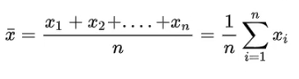

In [35]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\media_aritmetica.png')

In [36]:
dados = [1,2,5,3,4]

In [37]:
np.mean(dados)

3.0

**Média Geométrica (MG) - É a raíz n-ésima do produto de todos os elementos que compõe o conjunto.**

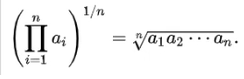

In [38]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\media_geometrica.png')

In [40]:
gmean(dados)

2.6051710846973517

**Média Harmônica (MH) - É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto.**

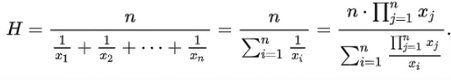

In [39]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\media_harmonica.png')

In [41]:
hmean(dados)

2.18978102189781

## Quando usar cada uma das médias?

### Funções para plotar gráficos

In [42]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [43]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [44]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [45]:
dados_linear = [1, 4, 7, 10, 13, 16, 19]

Calculando a média aritmética

In [46]:
media = int(np.mean(dados_linear))

In [47]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


Plotando os dados e seu valor central

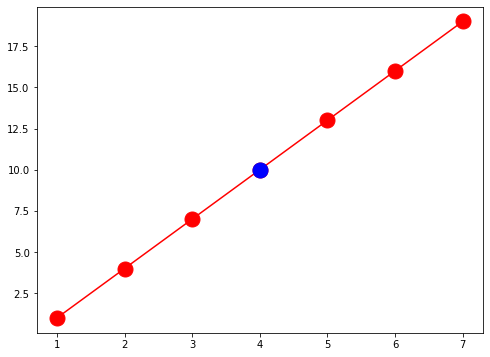

In [48]:
plot_lines(dados_linear,media)

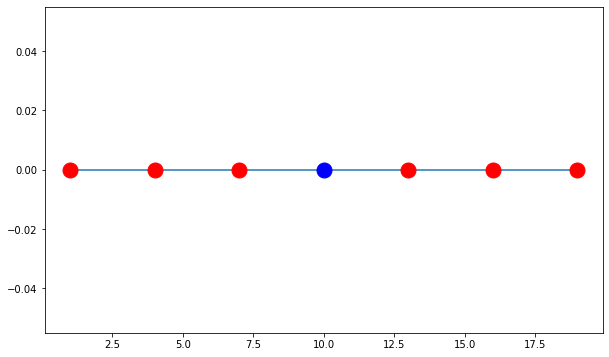

In [49]:
plot_lines_horizontal(dados_linear,media)

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a multiplicação de cada elemento pelo valor de 3 (relacionamento exponencial)

In [50]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média aritmética.

(1 + 3 + 9 + 27 + 81 + 243 + 729) ÷ 7 = **156.1**

In [51]:
media = int(np.mean(dados_exponencial))

In [52]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 156


Plotando os dados e seu valor central.

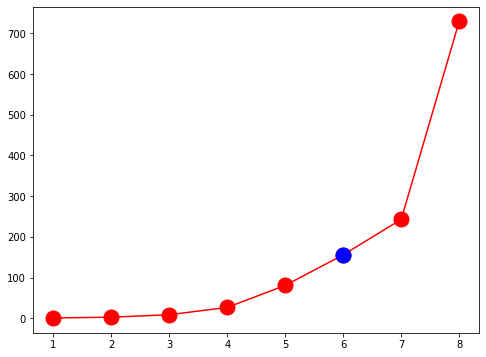

In [53]:
plot_lines(dados_exponencial,media)

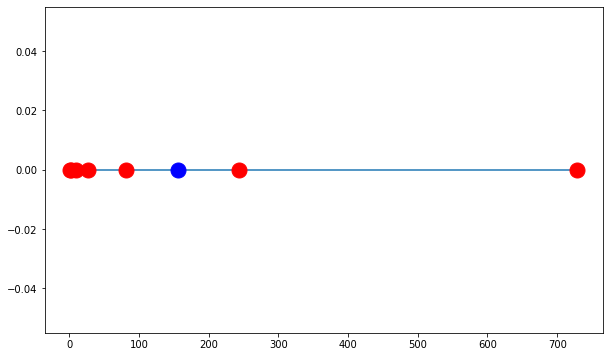

In [54]:
plot_lines_horizontal(dados_exponencial,media)

Considerando agora a aplicação da média geométrica.

Especificando os mesmos dados com um relacionando exponencial.

In [55]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média geométrica.

(1 * 3 * 9 * 27 * 81 * 243 * 729) = 10,460,353,203

Raiz sétima (7) de **10,460,353,203** = 27

In [56]:
media_geo = int(gmean(dados_exponencial))

In [57]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 27


Plotando os dados e seu valor central.

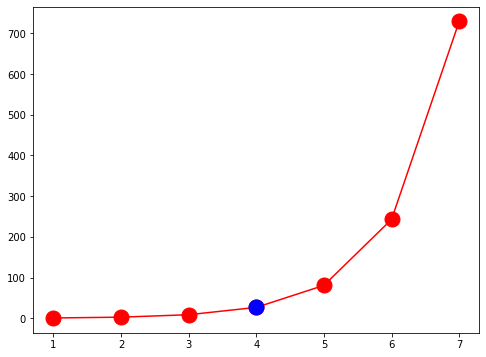

In [58]:
plot_lines(dados_exponencial,media_geo)

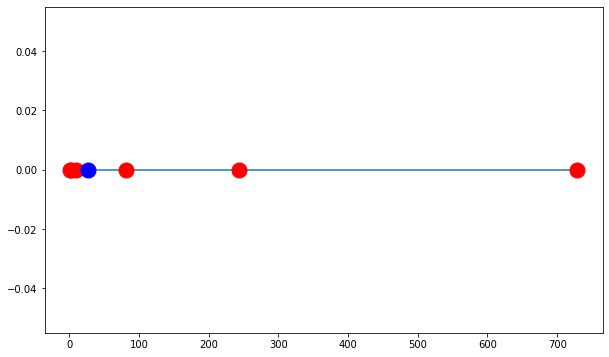

In [59]:
plot_lines_horizontal(dados_exponencial,media_geo)

### Considerações importantes

*   A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
*   Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
*   Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial.


*   A diferença entre as médias é que enquanto a média aritmética faz a **soma** de todos os elementos e depois a **divisão**, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da **raiz** os valores para a mesma unidade da amostra.

# 7.8 - Diferenças entre as Médias Aritmética, Geométrica e Harmônica

## Comparando as médidas em um cenário real.
### Verificando os valores de avaliações de dois cafés.
### Hard Rock Café Gramado vs Hard Rock Café Curitiba.

**Hard Rock Café Gramado**
*   Avaliações no TripAdvisor: 3,5
*   Índice de Satisfação dos Clientes: 89%

**Hard Rock Café Curitiba**
*   Avaliaçõs no TripAdvisor: 4,5
*   Índice de Satisfação dos Clientes: 75%

Aplicação para verificar qual o estabelecimento com a melhor avaliação em diferentes escalas.

Calculando a média aritmética

In [60]:
aval_gramado,aval_curitiba = 3.5, 4.5
indice_gramado,indice_curitiba = 89, 75

In [61]:
print("Média para Gramado: {}".format(np.mean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba,indice_curitiba])))

Média para Gramado: 46.25
Média para Curitiba: 39.75


Considerando a média aritmética o Hard Rock Café de Gramado é o estabelecimento melhor avaliado.

Agora vamos considerar a possibilidade de fazer uma reescala dos dados de avaliação do trip advisor.

In [62]:
print("Valores reescalados: {},{}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalados: 70.0,90.0


Calculando a média aritmética

In [63]:
print("Média para Gramado: {}".format(np.mean([aval_gramado*20,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba*20,indice_curitiba])))

# Importante reescalar os dados para ter conclusões concretas.

Média para Gramado: 79.5
Média para Curitiba: 82.5


Considerando o mesmo cenário agora utilizando a média geométrica.

In [66]:
print("Média Geométrica para Gramado: {}".format(gmean([aval_gramado,indice_gramado])))
print("Média Geométrica para Curitiba: {}".format(gmean([aval_curitiba,indice_curitiba])))

Média Geométrica para Gramado: 17.64936259472279
Média Geométrica para Curitiba: 18.371173070873837


### Considerações
*   Os valores alterados para a mesma escala nos deram **resultados diferentes** mais próximos da realidade.
*   Utilizando a média geométrica já nos entrega o resultado "correto" pois considera o **relacionamento multiplicativo** entre os dados da amostra.
*   É importante notar que aplicando a média geométrica para os dados em **diferentes escalas** o retorno não está na mesma unidade da amostra.

# 7.9 - Estudo de Caso sobre a Média Harmônica

## Média harmônica.

Percurso Total da Viagem 10km
*   CAMINHO DE IDA = 30km/h
*   CAMINHO DE VOLTA = 10km/h

**Qual a velocidade média da viagem?**

Usando a média aritmética

In [67]:
np.mean([30,10])

20.0

**VIAGEM DE IDA - 5km à 30km/h**
*   30 km por 60 minutos = 1 km a cada 2 minutos = 1/2 km por minuto.
*   5km a 1/2 km por minuto = 10 minutos.

**VIAGEM DE VOLTA - 5km à 10km/h**
*   10 km por 60 minutos = 1 km a cada 6 minutos = 1/6 km por minuto.
*   5 km a 1/6 km por minuto = 30 minutos.

Tempo total da viagem = 40 minutos

Proporção da viagem de ida em relação ao tempo total da viagem.

In [68]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%


In [69]:
print("Proporção de tempo da viagem de volta em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de volta em relação ao tempo total da viagem: 75.0%


Calculando a Média Aritmética Ponderada.

In [70]:
np.average([30,10], weights=[.25,.75])

15.0

In [71]:
hmean([30,10])

15.0

### As médias seguem um relacionamento ordinal: **média harmônica < média geométrica < a média aritmética**.

# 7.10 - Relacionamento Ordinal entre as Médias

Considerando os dados com o relacionamento aditivo.

In [72]:
dados = [1, 4, 7, 10, 13, 16, 19]

In [73]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [74]:
media_aritmetica,media_geometrica,media_harmonica

# média aritmética > média geométrica > média harmônica

(10.0, 7.3, 4.15)

Visualizando graficamente.

Dados: [1, 4, 4.15, 7, 7.3, 10, 10.0, 13, 16, 19]
Media aritmética: 10.0, Média Geométrica: 7.3, Média Harmonica: 4.15


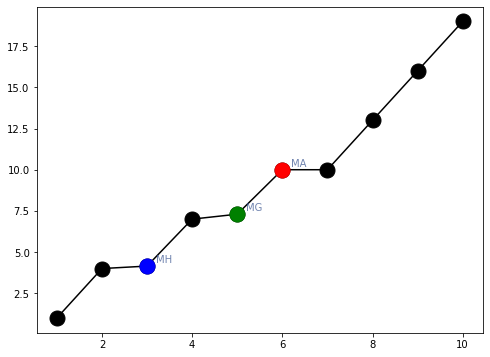

In [75]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

Considerando os dados com o relacionamento multiplicativo.

In [76]:
dados = [1, 3, 9, 27, 81, 243, 729]

In [77]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [78]:
media_aritmetica,media_geometrica,media_harmonica

(156.14, 27.0, 4.67)

Visualizando graficamente.

Dados: [1, 3, 4.67, 9, 27, 27.0, 81, 156.14, 243, 729]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


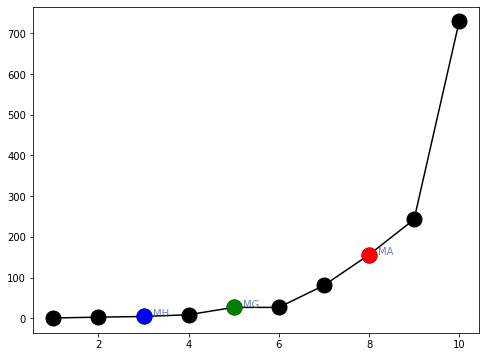

In [79]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

**Moda - Valores mais frequentes da distribuição**

In [80]:
dados=[4,5,4,6,5,8,4]

In [81]:
stats.mode(dados)

ModeResult(mode=array([4]), count=array([3]))

In [82]:
dados_bimodal=[4,5,4,6,5,8,4,4,5,5]

In [83]:
from collections import Counter

In [84]:
def calcula_moda(dados):
  number_counts = Counter(dados)
  print(number_counts)
  modes = [val for val,count in number_counts.items() if count == max(number_counts.values())]
  return modes

In [85]:
calcula_moda(dados_bimodal)

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [86]:
dados_amodal=[1,2,3,4,5]

In [87]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

**Mediana - É o valor da variável que divide os dados ordenados em duas partes de igual frequência.**

In [88]:
dados_mediana7 = [7,1,5,2,3,1,6]

In [89]:
# Ordenando os Valores
np.sort(dados_mediana7)

array([1, 1, 2, 3, 5, 6, 7])

In [90]:
np.median(dados_mediana7)

3.0

In [91]:
dados_mediana8 = [1,2,1,1,4,5,3,6]

In [92]:
# Ordenando os Valores
np.sort(dados_mediana8)

array([1, 1, 1, 2, 3, 4, 5, 6])

In [93]:
np.median(dados_mediana8)

2.5

# 7.11 - Medidas Separatrizes

In [94]:
notas = [13,25,69,72,33,41,28,17,65]

In [95]:
np.sort(notas)

array([13, 17, 25, 28, 33, 41, 65, 69, 72])

**Q1 - Primeiro Quartil**

In [96]:
np.quantile(notas,.25)

25.0

**Q2 - Segundo Quartil**

In [97]:
np.quantile(notas,.50)

33.0

Comparando com o valor da Mediana

In [98]:
np.median(notas)

33.0

**Q3 - Terceiro Quartil**

In [99]:
np.quantile(notas,.75)

65.0

**P25 - Percentil 25 = Q1**

In [100]:
np.percentile(notas,25)

25.0

**P50 - Percentil 50 = Q2**

In [101]:
np.percentile(notas,50)

33.0

**P75 - Percentil 75 = Q3**

In [102]:
np.percentile(notas,75)

65.0

# 7.12 - Medidas de Variação e Dispersão

In [105]:
dados_dispersao = [10,20,30,40,50,60,70,80,90,100]

**Média**

In [106]:
np.mean(dados_dispersao)

55.0

**Variância**

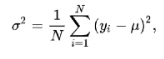

In [103]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\variancia.png')

In [107]:
np.var(dados_dispersao)

825.0

**Desvio Padrão**

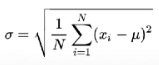

In [104]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\desv_pad.png')

In [108]:
np.std(dados_dispersao)

28.722813232690143

**Coeficiente de Variação**

In [109]:
stats.variation(dados_dispersao)

0.5222329678670935

Importante: Um coeficiente de variação **menor que 25%** é um bom indicativo de homogeneidade dos dados, ou seja, os dados não variam tanto a partir da média.

In [110]:
media=np.mean(dados_dispersao)
desvio_padrao = np.std(dados_dispersao)

In [111]:
desvio_padrao/media

0.5222329678670935

# Exemplo usando o Pandas

Importando as bibliotecas.

In [112]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados.

In [113]:
df = pd.read_csv(r"Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\cars.csv")

Verificando os dados.

In [114]:
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


Verificando as informações do conjunto de dados.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Limpando os dados do atributo MSRP.

In [116]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

Verificando os dados após limpeza.

In [117]:
df['MSRP'].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

Verificando as informações do conjunto de dados.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Transformando os dados para o formato numérico.

In [119]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 50.3+ KB


In [121]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Calculando a média aritmética.

In [122]:
df["MSRP"].mean()

32774.85514018692

In [123]:
msrp = df["MSRP"]

In [124]:
msrp.mean()

32774.85514018692

Média geométrica

In [125]:
gmean(msrp)

28841.635198804073

Média Harmônica

In [126]:
hmean(msrp)

25837.78463669279

Mediana

In [127]:
msrp.median()

27635.0

Moda

In [128]:
msrp.mode()

0     13270
1     15389
2     19635
3     19860
4     21055
5     21595
6     23495
7     23895
8     25700
9     27490
10    28495
11    29995
12    31545
13    33995
14    34495
15    35940
16    49995
17    74995
dtype: int64

Variação

In [129]:
msrp.var()

377591612.88763136

Desvio padrão

In [130]:
msrp.std()

19431.716673717518

Valor máximo.

In [131]:
msrp.max()

192465

Valor mínimo

In [132]:
msrp.min()

10280

# 7.13 - Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [133]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

Função para calcular estatísticas.

In [134]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

Considere a seguinte amostra.

In [135]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [136]:
calcula_estatisticas(s0)

Media: 5.08
Moda: 5.0
Mediana: 5
Variância: 0.41
Desvio Padrão: 0.64
Coeficiente Person: -0.08
Coeficiente de Kurtosi: -0.58


Distribuição Simétrica - Média = Moda = Mediana.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


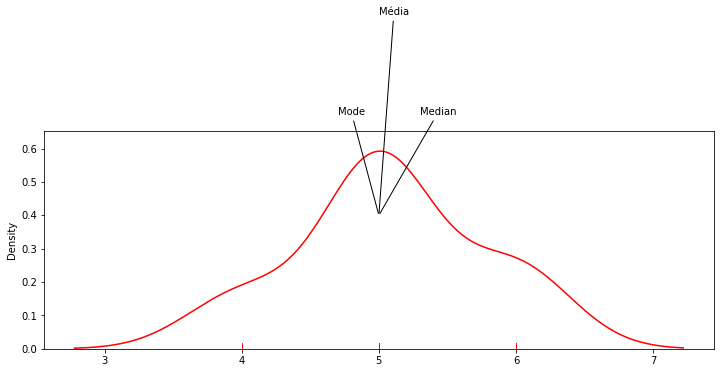

In [138]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s0,rug=True,kde=True,hist=False)

ax.annotate('Mode', xy=(5, 0.4), xytext=(4.7, 0.7),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(5, 0.4), xytext=(5.3, 0.7),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(5, 0.4), xytext=(5.0, 1), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Considere a segunda amostra.

In [139]:
s1 = [12,8.0, 4, 3, 2,1,1]

In [140]:
calcula_estatisticas(s1)

Media: 4.43
Moda: 3.0
Mediana: 1.0
Variância: 14.53
Desvio Padrão: 3.81
Coeficiente Person: 0.98
Coeficiente de Kurtosi: -0.45


Asimétrica Positiva / à direita - Média > Moda > Mediana

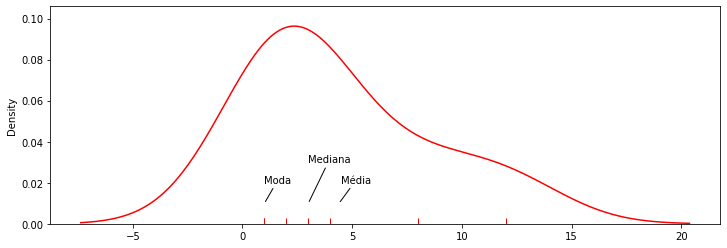

In [163]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s1,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(1,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(3, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(4.4, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de 1 a distribuição é assimétrica positiva

Considere a terceira amostra

In [142]:
s2 = [-3,-1,4,2.5,4,3]

In [143]:
calcula_estatisticas(s2)

Media: 1.58
Moda: 2.75
Mediana: 4.0
Variância: 7.03
Desvio Padrão: 2.65
Coeficiente Person: -0.73
Coeficiente de Kurtosi: -1.12


Asimétrica negativa / à esquerda - Média < Moda < Mediana

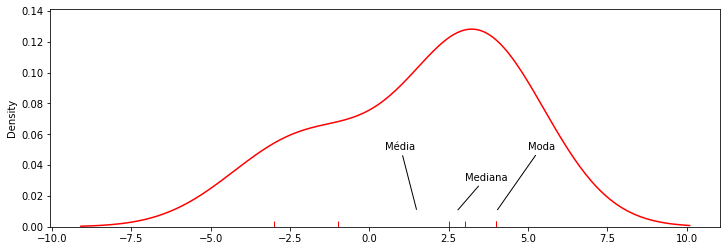

In [164]:
fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(s2,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(4,0.01), xytext=(5, 0.05),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(2.75, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(1.5, 0.01), xytext=(0.5, 0.05),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de -1 a distribuição é assimétrica negativa.

### Gerando dados aleatórios

Amostra seguindo uma distribuição normal

In [145]:
sample_normal = np.random.normal(1,0.5,500)

In [146]:
sample_normal[:10]

array([0.68046257, 1.02227285, 1.09553799, 0.82465446, 1.01437109,
       1.20433539, 1.16254479, 1.84438477, 0.24148848, 1.24838908])

In [147]:
calcula_estatisticas(sample_normal)

Media: 0.99
Moda: 0.98
Mediana: -0.69
Variância: 0.23
Desvio Padrão: 0.48
Coeficiente Person: -0.03
Coeficiente de Kurtosi: 0.11


Visualizando a distribuição

<AxesSubplot:ylabel='Density'>

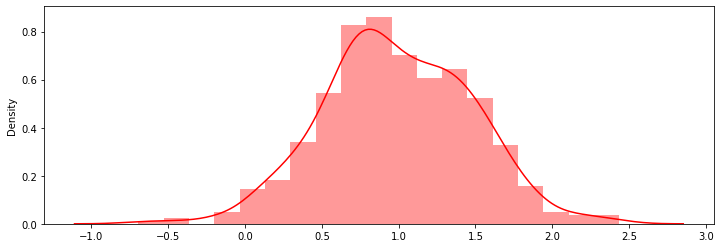

In [165]:
fig = plt.figure(figsize=(12, 4))
sns.distplot(sample_normal)

Distribuição simétrica, com o coeficiente de pearson próximo a zero.

Considere o seguinte exemplo

In [151]:
exp = np.arange(2,len(sample_normal),2)

Verificando os expoentes

In [152]:
exp[:10]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Gerando uma distribuição assimétrica positiva

In [153]:
sample_assimetrica_positiva = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_positiva.append(s*e)

In [154]:
calcula_estatisticas(sample_assimetrica_positiva)

Media: 245.96
Moda: 220.35
Mediana: -345.43
Variância: 40675.74
Desvio Padrão: 201.68
Coeficiente Person: 0.77
Coeficiente de Kurtosi: 0.52


Visualizando a distribuição

<AxesSubplot:ylabel='Density'>

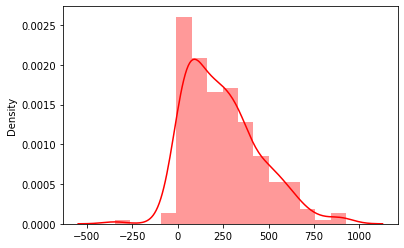

In [166]:
sns.distplot(sample_assimetrica_positiva)

Gerando uma distribuição assimétrica negativa.

In [156]:
exp = (np.arange(2,len(sample_normal),2))*-1

Verificando os expoêntes

In [157]:
exp[:10]

array([ -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

In [158]:
sample_assimetrica_negativa = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_negativa.append(s*e)

In [159]:
calcula_estatisticas(sample_assimetrica_negativa)

Media: -245.96
Moda: -220.35
Mediana: -925.82
Variância: 40675.74
Desvio Padrão: 201.68
Coeficiente Person: -0.77
Coeficiente de Kurtosi: 0.52


Visualizando a distribuição

<AxesSubplot:ylabel='Density'>

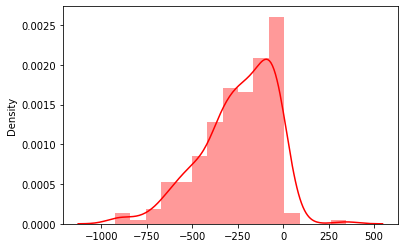

In [167]:
sns.distplot(sample_assimetrica_negativa)

Verificando graficamente as distribuições dos atributos do Dataframe

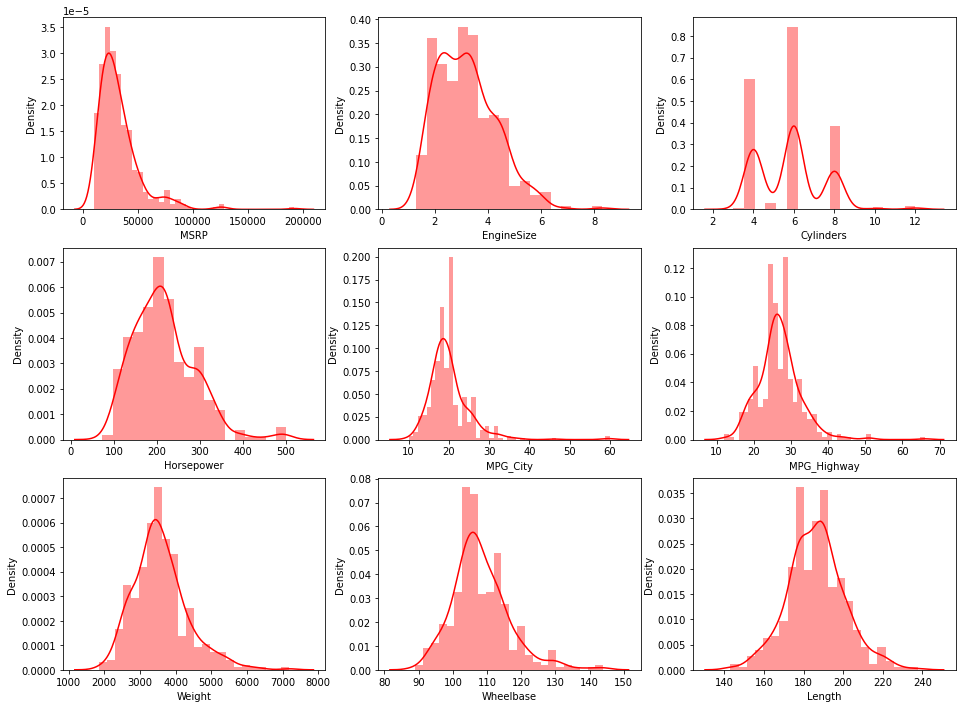

In [168]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//3,i%3])

Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [169]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: MSRP, Coeficiente de Variação: 59.29 %, Media: 32774.86, Mediana: 27635.0
Atributo: EngineSize, Coeficiente de Variação: 34.64 %, Media: 3.2, Mediana: 3.0
Atributo: Cylinders, Coeficiente de Variação: 26.82 %, Media: 5.81, Mediana: 6.0
Atributo: Horsepower, Coeficiente de Variação: 33.27 %, Media: 215.89, Mediana: 210.0
Atributo: MPG_City, Coeficiente de Variação: 26.11 %, Media: 20.06, Mediana: 19.0
Atributo: MPG_Highway, Coeficiente de Variação: 21.39 %, Media: 26.84, Mediana: 26.0
Atributo: Weight, Coeficiente de Variação: 21.21 %, Media: 3577.95, Mediana: 3474.5
Atributo: Wheelbase, Coeficiente de Variação: 7.69 %, Media: 108.15, Mediana: 107.0
Atributo: Length, Coeficiente de Variação: 7.7 %, Media: 186.36, Mediana: 187.0


# 7.15 - Detecção e Tratamento de Anomalidas

### Tratamento de Dados - Detecção de Anomalias

##### dataset para simulação de anomalias

In [170]:
import numpy

dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

dados = numpy.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


#### visualizando os valores anômalos

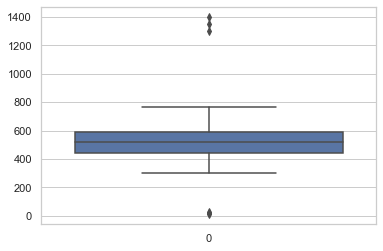

In [171]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dados);

##### verificando o valor da média

In [172]:
numpy.mean(dados, axis=0)

530.3673469387755

##### verificando o valor de desvio padrão

In [173]:
numpy.std(dados, axis=0)

192.51166875607043

##### fronteira de valor abaixo da média em duas vezes o desvio padrão

In [174]:
mean = numpy.mean(dados, axis=0)
sd = numpy.std(dados, axis=0)

In [175]:
mean - 2 * sd

145.34400942663467

##### fronteira de valores acima da média em duas vezes o desvio padrão

In [176]:
mean + 2 * sd

915.3906844509164

##### listando os valores abaixo da média em duas vezes o desvio padrão

In [177]:
for x in dados:
        if (x < mean - 2 * sd):
            print(x)

10
20
30


##### listando os valores acima da média em duas vezes o desvio padrão

In [178]:
for x in dados:
        if (x > mean + 2 * sd):
            print(x)

1300
1350
1400


#### removendo os valores muito abaixo da média (10,20,30)

In [179]:
dados = [x for x in dados if (x > mean - 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


#### removendo os valores muito acima da média (1300,1350,1400)

In [180]:
dados = [x for x in dados if (x < mean + 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


#### visualizando os valores novamente

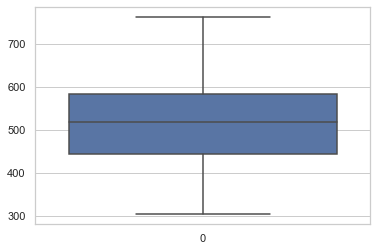

In [181]:
sns.boxplot(data=dados);

# 7.16 - Entendendo e Aplicando Discretização nos Dados

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [186]:
import pandas as pd

##### cojunto de dados de exemplo

In [187]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [188]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [189]:
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


##### verificando a quantidade de objetos em cada bin

In [190]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

##### lendo a base de dados

In [191]:
dataset = pd.read_csv(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\kc_house_data.csv')

##### contando o número de pisos

In [192]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [193]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [194]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [195]:
dataset['floors_labels'].unique()

['Muito-Pequeno', 'Pequeno', NaN, 'Grande', 'Medio', 'Muito-Grande']
Categories (5, object): ['Muito-Pequeno' < 'Pequeno' < 'Medio' < 'Grande' < 'Muito-Grande']

##### contagem de valores em cada bin ou categoria

In [196]:
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

# 7.17 - Entendendo e Aplicando Normalização de Dados

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

In [184]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\l2-norma.png')

##### vejamos um simples exemplo do calculo da norma L2.

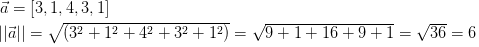

In [183]:
from IPython.display import Image
Image(r'Módulo 07 - Estatística Aplicada e Pré-Processamento de dados\materiais_apoio\l2-norma-exemplo.png')

##### importando as bibliotecas necessárias.

In [198]:
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### alguns dados de exemplo

In [199]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [200]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

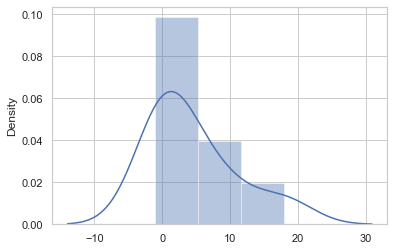

In [201]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

# reshape(): Transforma o dado em apenas uma dimensão

##### instanciando o objeto Normalize

In [202]:
normalizer = Normalizer().fit(data)

# Normalizer(): Aplica a norma L2 (raiz quadrada do somatório de todos os elementos do vetor ao quadrado)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [203]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [204]:
data2 = data2.reshape(-1)

#### valor da média

In [205]:
print(np.mean(data2))

0.4475919008033141


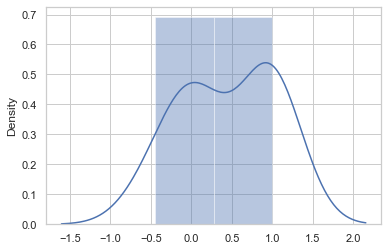

In [206]:
sns.distplot(data2)
plt.show()

# 7.18 - Aplicando técnicas de Standartization nos Dados

### Técnicas de pre-processamento de Dados - Standartization

In [207]:
# Técnica que padroniza os dados em uma mesma escala de valores
# Não altera a distribuição dos dados, faz uma reescala

data = np.random.normal(size = 50)
print(data)

[ 0.27613663  1.23798903  0.48115773 -1.35583208 -0.78591798 -0.10067644
 -0.05317201 -0.54522207 -0.54377991 -0.30320082  1.58642555 -2.76999217
 -0.21521877  0.34067031  1.73459047 -1.59220356 -0.05560792  0.95442599
 -0.3839735   0.07898653 -0.63836397  2.72815668  0.7699812   0.84954015
 -0.95716001  0.90800606  1.30909543  0.02909088 -0.43954689  0.09480296
  1.89086359  0.04318302  1.44536541  0.19934683  1.21782201 -0.94592985
 -0.17185478 -1.1028611  -1.18726641 -0.12081046  0.01015307  0.49652908
 -0.03310275 -1.95915999 -0.83413434 -0.54718391 -1.63235658 -0.65008161
  0.70028812 -0.86780614]


#### Alterando a forma dos dados para apenas uma dimensão

In [208]:
# Trandformando os dados em apenas uma dimensão
data = data.reshape(-1,1)

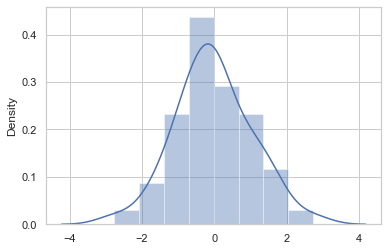

In [209]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [210]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [211]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [212]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.55402807]
 [0.72896921]
 [0.59131718]
 [0.25720658]
 [0.36086222]
 [0.48549354]
 [0.49413361]
 [0.40463985]
 [0.40490214]
 [0.44865852]
 [0.79234263]
 [0.        ]
 [0.46466065]
 [0.56576542]
 [0.81929078]
 [0.21421548]
 [0.49369057]
 [0.67739493]
 [0.43396764]
 [0.51817053]
 [0.38769925]
 [1.        ]
 [0.64384822]
 [0.65831836]
 [0.32971682]
 [0.6689521 ]
 [0.741902  ]
 [0.50909554]
 [0.42385998]
 [0.52104721]
 [0.84771364]
 [0.51165861]
 [0.7666867 ]
 [0.54006159]
 [0.72530124]
 [0.33175935]
 [0.47254766]
 [0.30321679]
 [0.28786521]
 [0.48183157]
 [0.50565114]
 [0.59411292]
 [0.4977838 ]
 [0.14747367]
 [0.35209266]
 [0.40428303]
 [0.20691248]
 [0.38556806]
 [0.63117249]
 [0.34596845]]


#### Alterando a forma dos dados para apenas uma dimensão

In [213]:
data_scaled = data_scaled.reshape(-1,1)

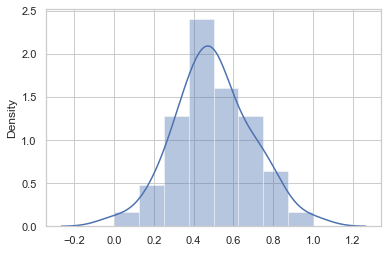

In [214]:
sns.distplot(data_scaled)
plt.show()

# 7.19 - Aplicando o StandardScaler nos Dados

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [215]:
data = np.random.normal(size = 50)
print(data)

[ 0.39040874 -0.19271079  0.33901177  0.85626796  0.41142638 -0.79671522
 -1.93309922  0.60048733  0.49734289 -0.07282113  0.22235671 -0.50118987
 -0.29927028  1.13374718 -0.49835896 -1.25254309  1.48231946  0.6319675
  0.48439437  0.22427954  0.493693   -0.16686351  0.20701548  0.08783557
  1.10014536 -0.6366666  -0.28467268  0.16346203  2.07692228  0.08126715
  0.28914167  1.06640075 -0.21287824 -0.48809919  0.80973482  0.73251416
 -0.1194732  -0.03934091  2.25870224  0.50714472 -1.37365162  0.05073358
  0.48873721 -1.64307681 -0.51747968  1.42811326  1.01144136 -0.77397928
  1.04585129 -1.92074434]


#### Alterando a forma dos dados para apenas uma dimensão

In [216]:
data = data.reshape(-1,1)

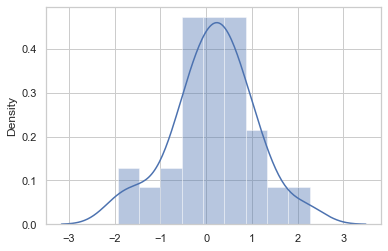

In [217]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [218]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [219]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [220]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.2718505 ]
 [-0.38475886]
 [ 0.21397603]
 [ 0.79642138]
 [ 0.29551697]
 [-1.06488522]
 [-2.34448629]
 [ 0.50840503]
 [ 0.39226143]
 [-0.24975966]
 [ 0.08261908]
 [-0.73211517]
 [-0.50474791]
 [ 1.10887096]
 [-0.72892749]
 [-1.57816052]
 [ 1.50137337]
 [ 0.54385261]
 [ 0.37768102]
 [ 0.08478424]
 [ 0.38815155]
 [-0.35565409]
 [ 0.06534442]
 [-0.06885559]
 [ 1.07103434]
 [-0.88466588]
 [-0.4883106 ]
 [ 0.01630198]
 [ 2.17091325]
 [-0.07625182]
 [ 0.15782087]
 [ 1.03303695]
 [-0.40746799]
 [-0.71737469]
 [ 0.74402373]
 [ 0.65707104]
 [-0.30229123]
 [-0.21205997]
 [ 2.37560271]
 [ 0.40329857]
 [-1.7145322 ]
 [-0.1106335 ]
 [ 0.38257119]
 [-2.01791272]
 [-0.75045797]
 [ 1.44033564]
 [ 0.97115109]
 [-1.0392839 ]
 [ 1.00989766]
 [-2.33057434]]


#### Alterando a forma dos dados para apenas uma dimensão

In [221]:
data_scaled = data_scaled.reshape(-1,1)

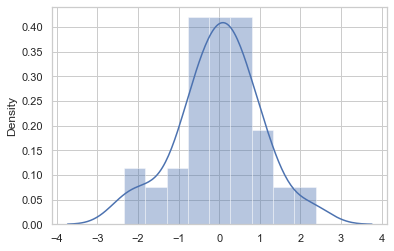

In [222]:
sns.distplot(data_scaled)
plt.show()